In [30]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated
from statistics import mean

In [31]:
# Equifax Baseline
equifax_d2_h0 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h0'))
equifax_d2_h2 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h2'))
equifax_d2_h4 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h4'))
equifax_d2_h6 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h6'))
equifax_d2_h8 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h8'))
equifax_d2_h10 = ingest_experiment_results(path.join('data/Signaling/EquifaxBaseline_d2_h10'))

In [32]:
# Decoy 1
equifaxbaseline_d2_h0_times = get_data_exfiltration_times(equifax_d2_h0)
equifaxbaseline_d2_h2_times = get_data_exfiltration_times(equifax_d2_h2)
equifaxbaseline_d2_h4_times = get_data_exfiltration_times(equifax_d2_h4)
equifaxbaseline_d2_h6_times = get_data_exfiltration_times(equifax_d2_h6)
equifaxbaseline_d2_h8_times = get_data_exfiltration_times(equifax_d2_h8)
equifaxbaseline_d2_h10_times = get_data_exfiltration_times(equifax_d2_h10)

In [33]:
# Percent of experiments all data exfiltrated
equifaxbaseline_d2_h0_percent = percent_of_data_exfiltrated(equifax_d2_h0)
equifaxbaseline_d2_h2_percent = percent_of_data_exfiltrated(equifax_d2_h2)
equifaxbaseline_d2_h4_percent = percent_of_data_exfiltrated(equifax_d2_h4)
equifaxbaseline_d2_h6_percent = percent_of_data_exfiltrated(equifax_d2_h6)
equifaxbaseline_d2_h8_percent = percent_of_data_exfiltrated(equifax_d2_h8)
equifaxbaseline_d2_h10_percent = percent_of_data_exfiltrated(equifax_d2_h10)

# Print percents to verify all 100
print(equifaxbaseline_d2_h0_percent)
print(equifaxbaseline_d2_h2_percent)
print(equifaxbaseline_d2_h4_percent)
print(equifaxbaseline_d2_h6_percent)
print(equifaxbaseline_d2_h8_percent)
print(equifaxbaseline_d2_h10_percent)

100.0
100.0
100.0
100.0
100.0
100.0


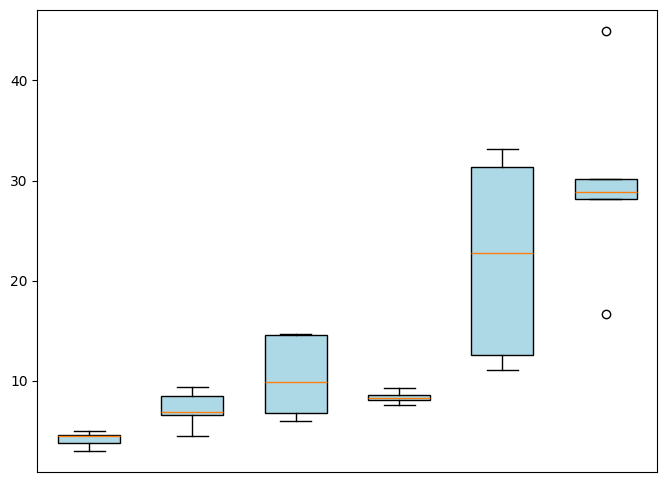

In [47]:
# Box plot comparing data exfiltration times
# positions = [.3, .6, .9, 1.2, 1.5, 2.2]
data = [equifaxbaseline_d2_h0_times, equifaxbaseline_d2_h2_times,
        equifaxbaseline_d2_h4_times, equifaxbaseline_d2_h6_times,
        equifaxbaseline_d2_h8_times, equifaxbaseline_d2_h10_times]

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, patch_artist=True, widths=0.6)

plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [38]:
# Create smooth CDF of data exfiltration times
plt.figure(figsize=(8, 6))

#plt.hist(baseline_exfiltration_times, bins=100, cumulative=True, histtype='step', label='Baseline', density=True)
plt.ecdf(baseline_exfiltration_times, label='HoneyCred 0')
plt.ecdf(d1_honeycred_0_times, label='HoneyCred 10')
plt.ecdf(d1_honeycred_10_times, label='HoneyCred 10')

plt.ecdf(greedy_d1_honeycred_0_times, label='Greedy HoneyCred 0')
plt.ecdf(greedy_d1_honeycred_10_times, label='Greedy HoneyCred 10')
# plt.hist(d1_honeycred_0_times, bins=100, cumulative=True, histtype='step', label='HoneyCred 0', density=True)
# plt.hist(d1_honeycred_10_times, bins=100, cumulative=True, histtype='step', label='HoneyCred 10', density=True)


plt.xlabel('Exfiltration Time (m)')
plt.ylabel('CDF')
plt.title('CDF of data exfiltration times for Equifax attacker')

NameError: name 'baseline_exfiltration_times' is not defined

<Figure size 800x600 with 0 Axes>

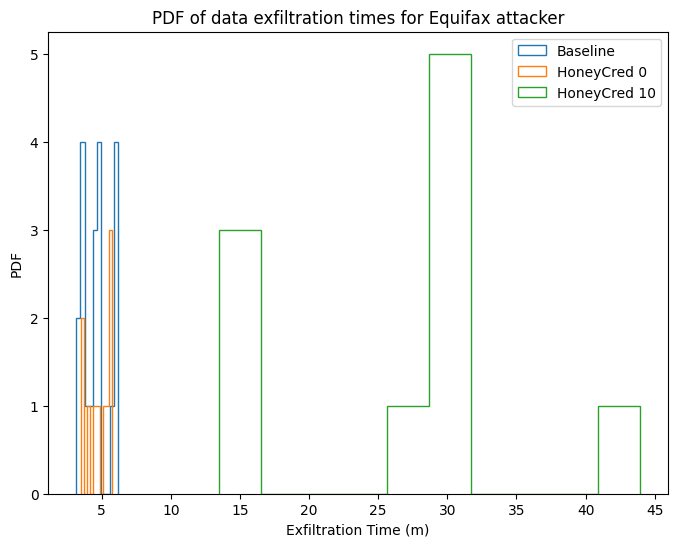

In [15]:
# plot pdf of data exfiltration times
plt.figure(figsize=(8, 6))
plt.hist(baseline_exfiltration_times, bins=10, histtype='step', label='Baseline')
plt.hist(d1_honeycred_0_times, bins=10, histtype='step', label='HoneyCred 0')
plt.hist(d1_honeycred_10_times, bins=10,histtype='step', label='HoneyCred 10')

# plt.hist(greedy_d1_honeycred_0_times, bins=100, density=True, histtype='step', label='Greedy HoneyCred 0')
# plt.hist(greedy_d1_honeycred_10_times, bins=100, density=True, histtype='step', label='Greedy HoneyCred 10')

plt.xlabel('Exfiltration Time (m)')
plt.ylabel('PDF')
plt.title('PDF of data exfiltration times for Equifax attacker')
plt.legend()
plt.show()

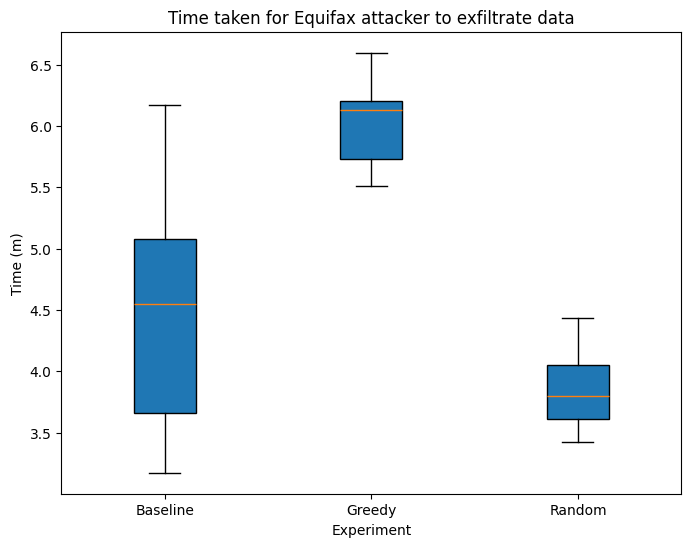

In [15]:
# Box and whisker plot of baseline vs greedy exfiltration times
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([baseline_exfiltration_times, greedy_baseline_exfiltration_times, random_baseline_exfiltration_times], patch_artist=True)

plt.xticks([1, 2, 3], ['Baseline', 'Greedy', 'Random'])

plt.ylabel('Time (m)')
plt.xlabel('Experiment')
plt.title('Time taken for Equifax attacker to exfiltrate data')

plt.show()
